# Integrated Urban Development Analysis: Connecting Economic Performance & Social Equity

**Multidimensional Urban Assessment Framework**: Urban development success requires balanced performance across multiple dimensions, with economic prosperity and social equity representing two critical aspects of sustainable urban environments. This analysis integrates metropolitan GDP data with inequality metrics (Gini coefficients) to develop a more holistic understanding of urban development patterns, identifying cities that excel in both dimensions versus those showing imbalances or deficits.

**Analytical Objectives & Strategic Value**: By connecting economic output with distributional outcomes, this analysis provides essential intelligence for urban policymakers, investors, and development institutions. Understanding which cities successfully balance growth and inclusion—and which models they employ—offers valuable templates for addressing one of the central urban development challenges: ensuring economic dynamism translates into broadly shared prosperity rather than concentrated wealth and social polarization.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the datasets
gdp_metropol = pd.read_excel('../data/gdp_metropol.xls')
gini_disposable = pd.read_excel('../data/gini_disposable_income.xls')
urban_popu = pd.read_excel('../data/urban_living_1.xlsx')
urban_greenspace = pd.read_excel('../data/urban_living_greenspace_2.xlsx')

# only run this with the above cells, other issues present. 
# manage dataset 1
# set row 1 to column names
gdp_metropol.columns = gdp_metropol.iloc[0]
gdp_metropol = gdp_metropol[1:]

# remove last two rows
gdp_metropol = gdp_metropol[:-2]

# manage dataset 2
# set row 1 to column names
gini_disposable.columns = gini_disposable.iloc[0]
gini_disposable = gini_disposable[1:]

# remove last three rows
gini_disposable = gini_disposable[:-3]

# melt data so years are rows not columns 
gini_disposable = gini_disposable.melt(id_vars=["Country", "City/region"], var_name="Year", value_name="Gini")

# convert ".." to proper nulls, then coerce to numeric
gini_disposable = gini_disposable[gini_disposable["Gini"] != ".."]
gini_disposable["Gini"] = pd.to_numeric(gini_disposable["Gini"], errors="coerce")

# manage dataset3
# remove unwanted columns by name
urban_popu = urban_popu.drop(columns=[
    'SDG Goal',
    'SDG Target',
    'SDG Indicator',
    'Country or Territory Name',
    'Data Units',
    'Data Source',
    'Footnote'
])

# manage dataset
# remove unwanted columns by name
urban_greenspace = urban_greenspace.drop(columns=[
    'SDG Goal',
    'SDG Target',
    'SDG Indicator',
    'Country or Territory Code',
    'City Code',
    'Data Units',
    'Data Source',
    'FootNote'
])

# rename long columns
urban_popu = urban_popu.rename(columns={
    'Proportion of urban population living in slums or informal settlements (%) (a)': 'Urban Slum %',
    'Proportion of urban population living in inadequate housing (%) (b)': 'Inadequate Housing %',
    'Country or Territory Name.1': 'Country',
    'Data Reference Year': 'Year',
})

urban_greenspace = urban_greenspace.rename(columns={
    'Average share of the built-up area of cities that is open space for public use for all (%) [a]': 'Open_Space_Share',
    'Average share of urban population with convenient access to open public spaces (%) [b]': 'Urban_Public_Access',
    'Country or Territory Name': 'Country',
    'Data Reference Year': 'Year',
})

In [2]:
w = gdp_metropol
x = gini_disposable
y = urban_popu
z = urban_greenspace

print(w.columns, x.columns, y.columns, z.columns)

Index(['Country', 'Metropolitan areas', 'Value 2017'], dtype='object', name=0) Index(['Country', 'City/region', 'Year', 'Gini'], dtype='object') Index(['Country', 'SDG Region', 'SDG Sub-Region', 'Urban Slum %',
       'Inadequate Housing %', 'Year'],
      dtype='object') Index(['Country', 'SDG Region', 'SDG Sub-Region', 'City Name',
       'Open_Space_Share', 'Urban_Public_Access', 'Year'],
      dtype='object')


## Data Integration Strategy: Aligning Multiple Urban Development Indicators

**Cross-Dataset Alignment Challenges**: Integrating metropolitan economic data with inequality measurements presents significant technical challenges due to different data collection methodologies, geographic definitions, and temporal dimensions. The datasets employ varying naming conventions for both countries and cities, requiring careful harmonization to enable meaningful combined analysis without introducing artificial associations or losing critical observations through overly strict matching.

**Dataset Characteristics & Complementarity**: Each dataset brings unique strengths to the integrated analysis. The metropolitan GDP data provides granular economic performance metrics for urban areas across multiple countries, while the Gini coefficient data captures distributional outcomes reflecting how economic benefits are shared within these same urban environments. The urban population and greenspace datasets provide additional contextual dimensions that could further enrich the analysis through subsequent integration stages, creating a comprehensive urban development assessment framework.

In [32]:
w[w['Country'] == 'United States']
#x[x['Country'] == ' United States']
#y[y['Country'] == 'United States of America']
#z[z['Country'] == 'United States']

,Country,Metropolitan areas,Value 2017
278,United States,New York (Greater),1676319
279,United States,Los Angeles (Greater),1138721
280,United States,Chicago,641022
281,United States,Washington (Greater),949948
282,United States,San Francisco (Greater),785176
...,...,...,...
439,United States,Linn,16882
440,United States,Lafayette (IN),10755
441,United States,Weber,10288
442,United States,Cass,14050


In [24]:
#x.sample(8)
print(x['Country'].unique())


['Kazakhstan' 'Singapore' 'Vietnam' 'Argentina' 'Colombia' 'Costa Rica'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Honduras' 'Mexico' 'Panama'
 'Paraguay' 'Peru' 'Uruguay' 'Venezuela' 'Turkey' 'China' 'Thailand'
 'Angola' 'South Africa' 'Philippines' 'France' 'United Kingdom' 'Austria'
 'Belgium' 'Norway' 'Sweden' 'Yemen' ' United States' 'Canada' 'Italy'
 'Portugal']


## Geographic Harmonization: Standardizing National & City Identifiers

**Cross-Country Naming Convention Challenges**: A critical challenge in cross-dataset integration is the inconsistent naming conventions for countries and cities. Different datasets employ varied formats, abbreviations, and spelling conventions, necessitating systematic harmonization to enable successful merging without data loss. The exploratory analysis reveals the specific inconsistencies that must be addressed before meaningful integration can proceed.

**Strategic Standardization Approach**: The standardization process employs multiple techniques including whitespace normalization, case standardization, and careful matching validation to ensure accurate entity alignment. This methodical approach preserves data integrity while maximizing the number of successful matches between datasets, creating the robust foundation necessary for comparative analysis of economic performance and inequality measures across diverse urban environments.

In [91]:
# lets merge w and x
# strip leading space from x and rename city columns
x['Country'] = x['Country'].str.strip()
w = w.rename(columns={'Metropolitan areas': 'City'})
x = x.rename(columns={'City/region': 'City'})
w['City'] = w['City'].str.strip()
x['City'] = x['City'].str.strip()
w['City'] = w['City'].str.lower()
x['City'] = x['City'].str.lower()

# do the merge
wx = pd.merge(
    w,
    x,
    on=['Country', 'City'],
    how='inner'  # or 'left' if you want to keep all rows from w
)
# After merging into wx
wx['Value 2017'] = pd.to_numeric(wx['Value 2017'], errors='coerce')


## Multi-Dataset Integration: Metropolitan Economic & Inequality Fusion

**Strategic Data Joining Methodology**: The integration of metropolitan GDP and inequality data requires careful consideration of joining methodology to balance completeness against precision. An inner join approach ensures analytical integrity by including only cities with data available in both datasets, preventing the introduction of null values that could skew subsequent analysis. While this approach necessarily excludes cities present in only one dataset, it creates a clean integrated dataset enabling reliable comparative analysis.

**Harmonization Techniques**: The merging process incorporates several critical data harmonization techniques: string standardization removes inconsistencies in whitespace and capitalization, city and country naming conventions are aligned across datasets, and a systematic approach ensures each metropolitan area is correctly matched between economic and inequality measurements. These preprocessing steps are essential for creating valid connections between economic performance and social equity outcomes in urban environments.

In [ ]:
wx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     292 non-null    object 
 1   City        292 non-null    object 
 2   Value 2017  292 non-null    int64  
 3   Year        292 non-null    object 
 4   Gini        288 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 11.5+ KB


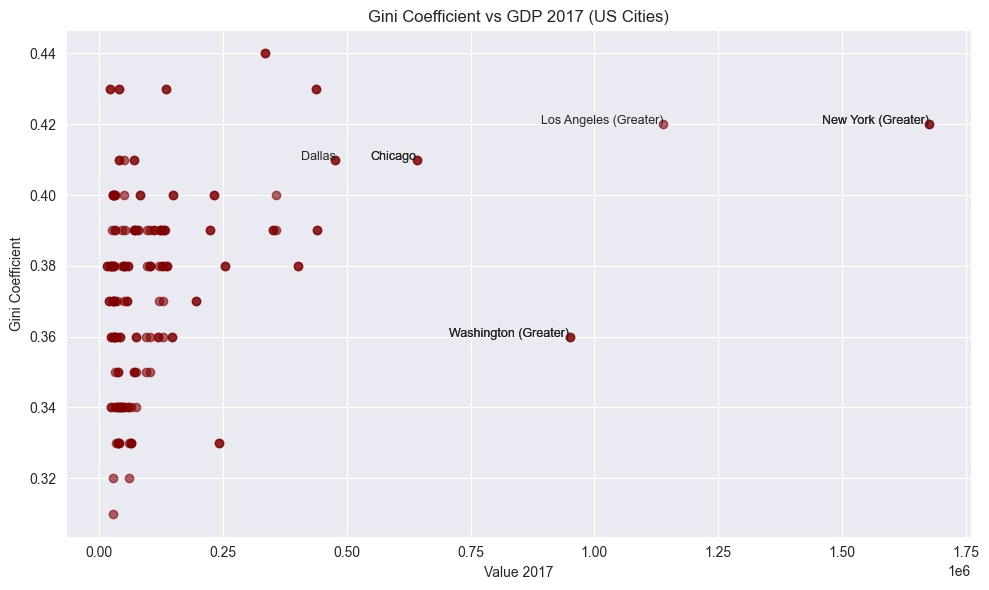

In [94]:
# Filter only US cities
us_data = wx[wx['Country'] == 'United States']

# Get top 6 cities by Value 2017
top6 = us_data.sort_values('Value 2017', ascending=False).head(8)

# plot
sns.set_style("dark")
plt.figure(figsize=(10, 6))
plt.scatter(us_data['Value 2017'], us_data['Gini'], alpha=0.6, color='maroon')
plt.title('Gini Coefficient vs GDP 2017 (US Cities)')
plt.xlabel('Value 2017')
plt.ylabel('Gini Coefficient')
plt.grid(True)

# Add labels for top 6
for _, row in top6.iterrows():
    plt.text(row['Value 2017'], row['Gini'], row['City'].title(), fontsize=9, ha='right')

plt.tight_layout()
plt.show()

## United States Urban Analysis: Economic Scale & Inequality Patterns

**Metropolitan Economic Hierarchy & Equity Outcomes**: The analysis of U.S. cities reveals important patterns in the relationship between metropolitan economic scale and income distribution outcomes. The visualization exposes whether larger economic centers systematically demonstrate different inequality patterns than smaller metropolitan areas, providing insight into how urban scale might influence distributional dynamics through mechanisms such as agglomeration effects, housing markets, and labor force composition.

**Policy Relevance for National Urban Strategy**: Understanding the economic-inequality relationship within a single national policy context eliminates cross-country governance variables, allowing clearer identification of how metropolitan characteristics correlate with distributional outcomes. This analysis provides valuable intelligence for U.S. urban policy development, highlighting which cities have successfully balanced economic dynamism with inclusive outcomes and which face challenges of growth without shared prosperity. These insights inform both national urban policy frameworks and city-specific intervention strategies.

In [95]:
# find top performers for Value 2017
top_gdp = wx.sort_values('Value 2017', ascending=False).head(20)
top_gini = wx.sort_values('Gini', ascending=True).head(20)

display(top_gdp, top_gini)

,Country,City,Value 2017,Year,Gini
114,United States,new york (greater),1676319,2015,0.420
115,United States,new york (greater),1676319,2016,0.420
116,United States,los angeles (greater),1138721,2015,0.420
120,United States,washington (greater),949948,2016,0.360
119,United States,washington (greater),949948,2015,0.360
9,France,paris,891730,2015,0.330
7,France,paris,891730,2013,0.330
6,France,paris,891730,2012,0.340
8,France,paris,891730,2014,0.340
65,United Kingdom,london,840175,2016,0.430


,Country,City,Value 2017,Year,Gini
28,France,nantes,42217,2014,0.24
29,France,nantes,42217,2015,0.24
27,France,nantes,42217,2013,0.24
40,France,saint-etienne,16169,2014,0.24
39,France,saint-etienne,16169,2013,0.25
45,France,rennes,29072,2015,0.25
38,France,saint-etienne,16169,2012,0.25
26,France,nantes,42217,2012,0.25
44,France,rennes,29072,2014,0.25
41,France,saint-etienne,16169,2015,0.25


## Dimensional Excellence Identification: Economic & Equity Champions

**Unidimensional Performance Assessment**: The identification of top-performing cities along individual dimensions reveals important patterns in urban development specialization. Cities excelling in GDP demonstrate economic dynamism and productive capacity, while those with the lowest Gini coefficients showcase effective approaches to inclusive growth and equitable development. These unidimensional rankings provide valuable benchmarks for understanding excellence in specific aspects of urban development.

**Strategic Intelligence for Multi-Objective Policy**: Understanding which cities achieve excellence in economic output versus distributional equity—and identifying the rare cases excelling in both—provides critical intelligence for urban policymakers balancing multiple development objectives. This analysis exposes potential trade-offs between growth and inclusion while also identifying models that successfully transcend such trade-offs, offering valuable templates for integrated urban development strategies that pursue prosperity and equity simultaneously.

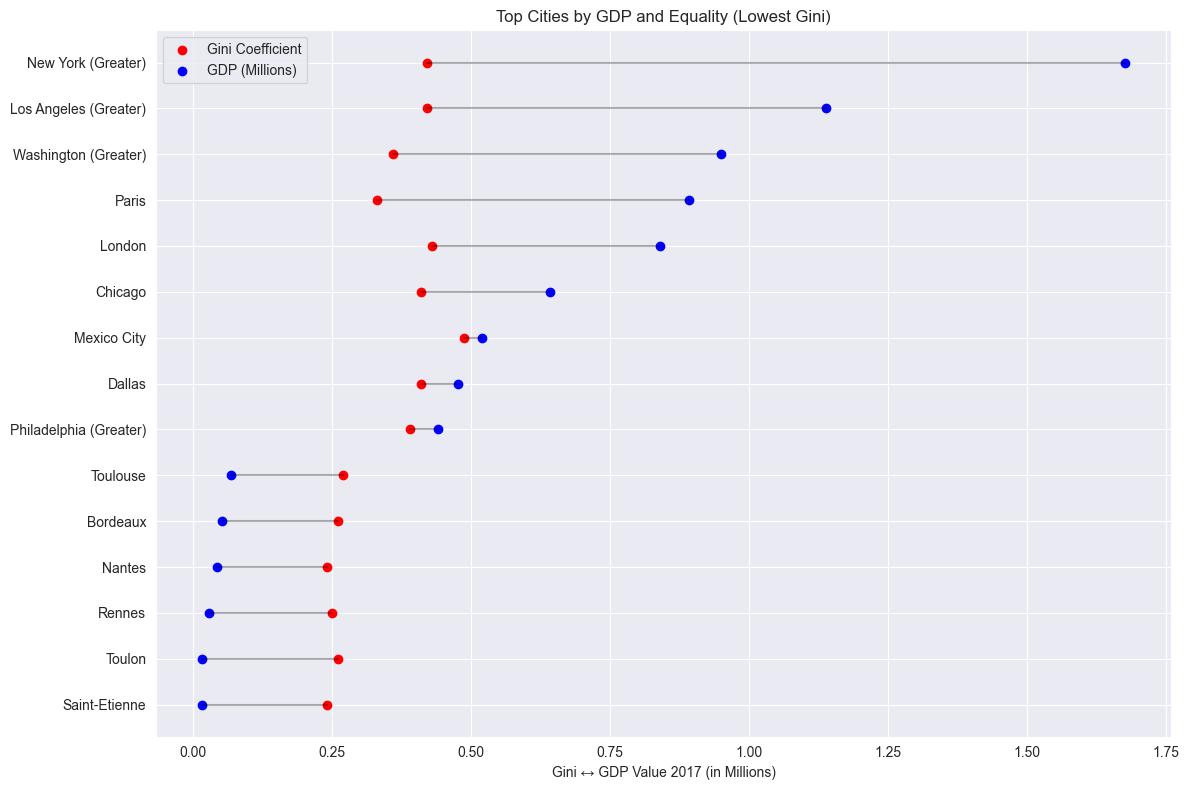

In [98]:
# Combine and drop duplicates (in case overlap)
combined = pd.concat([top_gdp, top_gini]).drop_duplicates(subset=['City'])

# Sort by GDP for cleaner plot
combined = combined.sort_values('Value 2017')

# Plot
plt.figure(figsize=(12, 8))

# Draw lines between Gini and GDP for each city
for i, row in combined.iterrows():
    plt.plot([row['Gini'], row['Value 2017']/1e6], [row['City'].title()] * 2, 'k-', alpha=0.3)

# Plot Gini as red dots
plt.scatter(combined['Gini'], combined['City'].str.title(), color='red', label='Gini Coefficient')

# Plot GDP as blue dots
plt.scatter(combined['Value 2017']/1e6, combined['City'].str.title(), color='blue', label='GDP (Millions)')

plt.xlabel('Gini ↔ GDP Value 2017 (in Millions)')
plt.title('Top Cities by GDP and Equality (Lowest Gini)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Performance Quadrant Framework: Situating Cities in the Growth-Equity Landscape

**Multidimensional Classification System**: The quadrant framework creates a structured approach for understanding urban development patterns along both economic and equity dimensions simultaneously. By dividing cities into four distinct categories—high growth/high equity, high growth/low equity, low growth/high equity, and low growth/low equity—the analysis provides a nuanced typology that captures the multidimensional nature of urban development outcomes better than unidimensional rankings.

**Strategic Positioning & Development Pathways**: This classification system reveals both current positioning and potential development trajectories for cities. Those in the high growth/low equity quadrant may need to focus on distributional policies while maintaining economic dynamism, while those in the low growth/high equity quadrant might prioritize economic development while preserving equitable systems. The framework provides a valuable strategic compass for tailoring development strategies to a city's specific positioning in the growth-equity landscape.

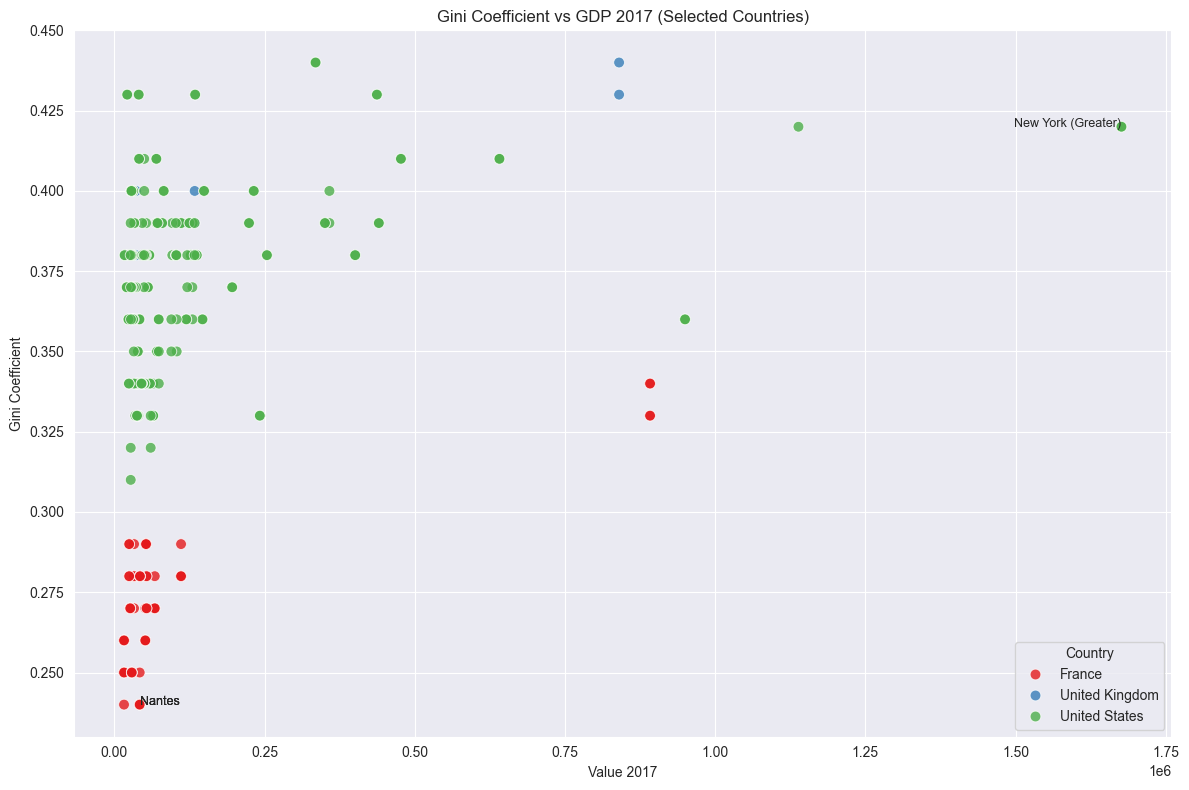

In [96]:
# Select countries of interest
selected_countries = ['United States', 'France', 'United Kingdom']
subset = wx[wx['Country'].isin(selected_countries)]

# Get top 6 cities by Value 2017
top6 = wx.sort_values('Value 2017', ascending=False).head(1)
top8 = wx.sort_values('Gini', ascending=True).head(3)

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=subset,
    x='Value 2017',
    y='Gini',
    hue='Country',
    palette='Set1',
    s=60,
    alpha=0.8
)

# Add labels for top 6
for _, row in top6.iterrows():
    plt.text(row['Value 2017'], row['Gini'], row['City'].title(), fontsize=9, ha='right')

# Add labels for top 8
for _, row in top8.iterrows():
    plt.text(row['Value 2017'], row['Gini'], row['City'].title(), fontsize=9, ha='left')

# plot
plt.title('Gini Coefficient vs GDP 2017 (Selected Countries)')
plt.xlabel('Value 2017')
plt.ylabel('Gini Coefficient')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


## Cross-National Metropolitan Comparison: Economic Performance within National Contexts

**Multi-Country Urban Hierarchy Analysis**: The comparative analysis of top metropolitan economies across selected countries reveals important patterns in how urban economic hierarchies are structured within different national contexts. Some countries demonstrate steep hierarchies with dominant primary cities, while others show more balanced urban systems with multiple significant economic centers. These patterns reflect both historical development trajectories and contemporary urban policy approaches.

**National System Effects on Urban Performance**: By analyzing metropolitan performance within country groupings, the analysis controls for national-level factors like governance systems, regulatory frameworks, and macroeconomic conditions that influence all cities within a country. This approach enables more meaningful cross-national comparisons by highlighting the relative performance of cities within their specific national urban systems, providing intelligence on both within-country urban hierarchies and cross-national patterns in metropolitan economic development.

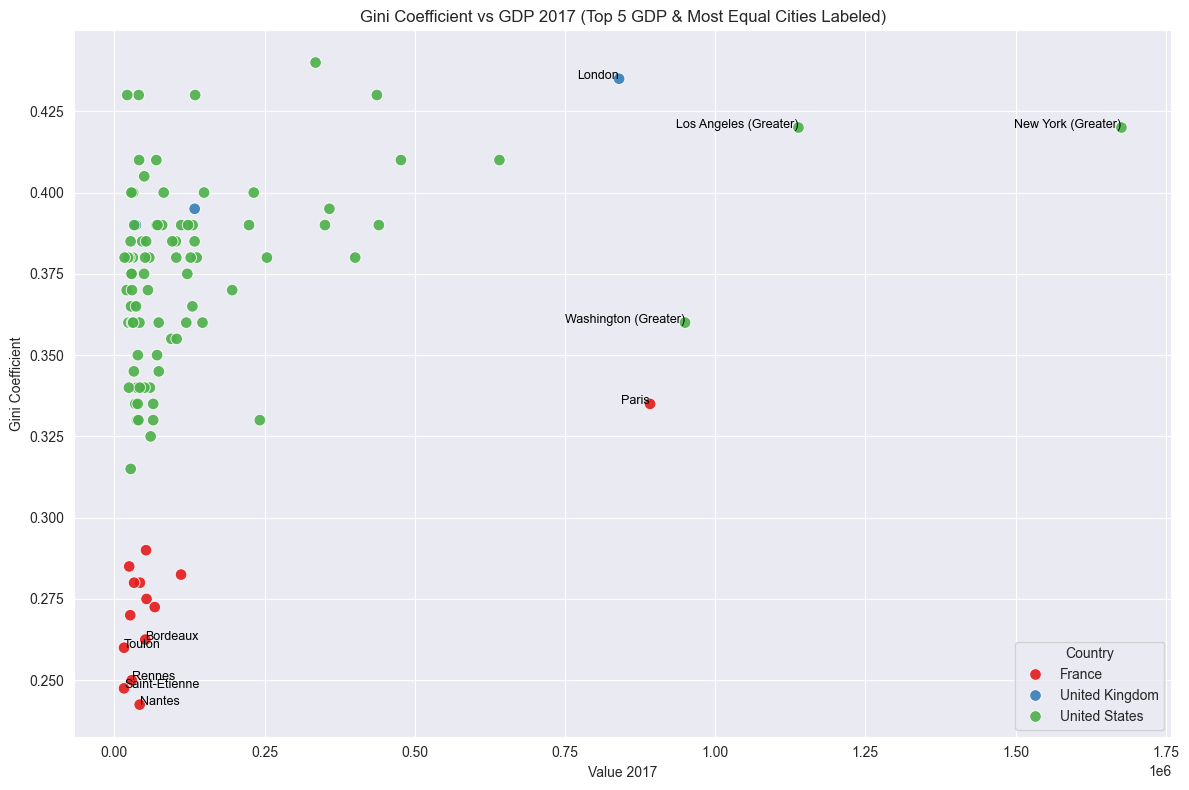

In [97]:
# Filter for selected countries
selected_countries = ['United States', 'France', 'United Kingdom', 'South Korea']
subset = wx[wx['Country'].isin(selected_countries)]

# Aggregate by city
agg = subset.groupby(['Country', 'City'], as_index=False).agg({
    'Value 2017': 'mean',
    'Gini': 'mean'
})

# Get top 5 by Value and lowest 5 by Gini
top_value = agg.nlargest(5, 'Value 2017')
lowest_gini = agg.nsmallest(5, 'Gini')

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=agg,
    x='Value 2017',
    y='Gini',
    hue='Country',
    palette='Set1',
    s=70,
    alpha=0.9
)

# Label top 5 GDP cities
for _, row in top_value.iterrows():
    plt.text(row['Value 2017'], row['Gini'], row['City'].title(), fontsize=9, ha='right', color='black')

# Label lowest 5 Gini cities
for _, row in lowest_gini.iterrows():
    plt.text(row['Value 2017'], row['Gini'], row['City'].title(), fontsize=9, ha='left', color='black')

plt.title('Gini Coefficient vs GDP 2017 (Top 5 GDP & Most Equal Cities Labeled)')
plt.xlabel('Value 2017')
plt.ylabel('Gini Coefficient')
plt.grid(True)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


## Strategic Synthesis: Integrating Economic Performance & Social Equity for Sustainable Urban Development

**Balanced Urban Development Framework**: This integrated analysis reveals the complex relationship between economic performance and social equity in urban environments, highlighting both potential synergies and tensions between these critical dimensions. The data suggests several key patterns: first, no automatic relationship exists between metropolitan economic scale and inequality, with high-performing cities found across the equity spectrum; second, national context significantly influences urban outcomes, suggesting the importance of national policy frameworks; and third, some cities successfully combine economic dynamism with equitable outcomes, demonstrating that trade-offs between growth and inclusion are not inevitable.

**Policy Implications & Strategic Direction**: The findings suggest several strategic imperatives for urban policymakers and development institutions. Cities should pursue integrated approaches that consider distributional outcomes alongside growth objectives from the outset, rather than treating equity as an afterthought. High-performing cities that excel in both dimensions offer valuable policy templates worthy of detailed case study analysis. The quadrant framework provides a valuable strategic tool for cities to situate their current performance and identify targeted intervention strategies based on their specific positioning in the growth-equity landscape.

**Future Research Directions**: Building on this integrated analysis, several promising research directions emerge. First, expanding the temporal dimension could reveal whether economic growth eventually translates into equity improvements or whether specific policies are required to ensure inclusive outcomes. Second, incorporating additional dimensions such as environmental sustainability, housing affordability, and public service quality would create an even more comprehensive urban development assessment framework. Finally, more granular analysis of within-city inequality patterns would complement the city-level analysis, providing insight into neighborhood-level dynamics and spatial inequality patterns that may be obscured by city-wide averages.